Notebook to explore SEER data

In [16]:
import pandas as pd

In [17]:
!pwd

/Users/patxiestomba/canceritos/notebooks


In [18]:
file_name = "../data/processed/seer/incidence/yr1973_2008.seer9/COLRECT.TXT"

In [19]:
columns_keep=['Patient ID number',
 'Registry ID',
 'Marital Status at DX',
 'Sex',
 'Age at diagnosis',
 'Year of Birth',
 'Birth Place',
 'Sequence Number--Central',
 'Month of diagnosis',
 'Year of diagnosis',
 'Primary Site',
 'Laterality',
 'Grade',
 'Diagnostic Confirmation',
 'Type of Reporting Source',
 'EOD—Tumor Size',
 'EOD—Extension',
 'EOD—Lymph Node Involv',
 'Regional Nodes Positive',
 'Regional Nodes Examined',
 'RX Summ—Surg Prim Site',#98+
 'Reason for no surgery',
 'RX Summ—Radiation',
 'RX Summ—Surg / Rad Seq',
 #'SEER Record Number',
 'Age Recode <1 Year olds',
 'Histology Recode—Broad Groupings',
 'Race recode (W, B, AI, API)',
 'SEER Cause-Specific Death Classification',
 'SEER historic stage A',
 'Number of primaries',
 'First malignant primary indicator',
 'State-county recode',
 'Survival time recode',
 'Cause of Death to SEER site recode']

In [20]:
data = pd.read_csv(file_name, sep=",", usecols=columns_keep, dtype=str)

In [21]:
data = data.replace(r'\s+', pd.np.nan, regex=True)

In [22]:
for column in data.columns:
    print(column, data[column].dtype)

Patient ID number object
Registry ID object
Marital Status at DX object
Sex object
Age at diagnosis object
Year of Birth object
Birth Place object
Sequence Number--Central object
Month of diagnosis object
Year of diagnosis object
Primary Site object
Laterality object
Grade object
Diagnostic Confirmation object
Type of Reporting Source object
EOD—Tumor Size object
EOD—Extension object
EOD—Lymph Node Involv object
Regional Nodes Positive object
Regional Nodes Examined object
RX Summ—Surg Prim Site object
Reason for no surgery object
RX Summ—Radiation object
RX Summ—Surg / Rad Seq object
Age Recode <1 Year olds object
Histology Recode—Broad Groupings object
Race recode (W, B, AI, API) object
SEER historic stage A object
Number of primaries object
First malignant primary indicator object
State-county recode object
Survival time recode object
Cause of Death to SEER site recode object
SEER Cause-Specific Death Classification object


In [23]:
data.isnull().sum()

Patient ID number                                0
Registry ID                                      0
Marital Status at DX                             0
Sex                                              0
Age at diagnosis                                 0
Year of Birth                                   24
Birth Place                                      0
Sequence Number--Central                         0
Month of diagnosis                               0
Year of diagnosis                                0
Primary Site                                     0
Laterality                                       0
Grade                                            0
Diagnostic Confirmation                          0
Type of Reporting Source                         0
EOD—Tumor Size                              241057
EOD—Extension                               241057
EOD—Lymph Node Involv                       241057
Regional Nodes Positive                     172887
Regional Nodes Examined        

In [24]:
data.describe()

,Patient ID number,Registry ID,Marital Status at DX,Sex,Age at diagnosis,Year of Birth,Birth Place,Sequence Number--Central,Month of diagnosis,Year of diagnosis,...,Age Recode <1 Year olds,Histology Recode—Broad Groupings,"Race recode (W, B, AI, API)",SEER historic stage A,Number of primaries,First malignant primary indicator,State-county recode,Survival time recode,Cause of Death to SEER site recode,SEER Cause-Specific Death Classification
count,463675,463675,463675,463675,463675,463651,463675,463675,463675,463675,...,463675,463675,463675,463675,463675,463675,463675,463675,463675,463675
unique,438683,9,6,2,103,126,224,12,12,36,...,20,24,6,5,10,2,208,432,94,3
top,07224545,0000001520,2,1,076,1921,999,00,03,1998,...,15,05,1,1,01,1,26163,0001,21040,0
freq,6,81765,259423,233680,14623,12815,105099,324613,40973,14657,...,71159,393924,394297,167769,338242,370019,46438,20459,139208,229170


In [25]:
data=data[(data["SEER Cause-Specific Death Classification"]=="1") & (data["Survival time recode"]!="0000")]

In [26]:
data["Survival months"]=data["Survival time recode"].map(lambda x: int(x[0:2])*12+int(x[2:4]))

In [27]:
data['Year of diagnosis']=data['Year of diagnosis'].astype(int)

In [28]:
%matplotlib inline

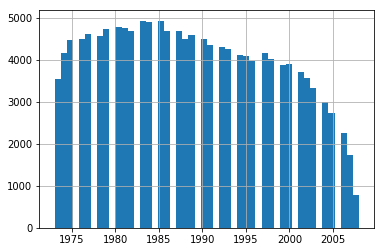

In [29]:
data['Year of diagnosis'].hist(bins=50)

In [30]:
data=data[(data['Year of diagnosis']>=1988) & (data['Year of diagnosis']<=2003)]

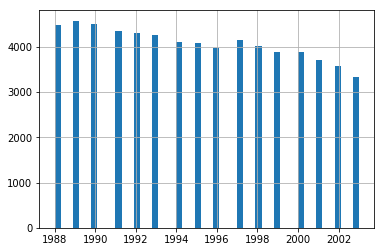

In [31]:
data['Year of diagnosis'].hist(bins=50)

## Exploratory

In [32]:
data.columns[2:]

Index(['Marital Status at DX', 'Sex', 'Age at diagnosis', 'Year of Birth',
       'Birth Place', 'Sequence Number--Central', 'Month of diagnosis',
       'Year of diagnosis', 'Primary Site', 'Laterality', 'Grade',
       'Diagnostic Confirmation', 'Type of Reporting Source', 'EOD—Tumor Size',
       'EOD—Extension', 'EOD—Lymph Node Involv', 'Regional Nodes Positive',
       'Regional Nodes Examined', 'RX Summ—Surg Prim Site',
       'Reason for no surgery', 'RX Summ—Radiation', 'RX Summ—Surg / Rad Seq',
       'Age Recode <1 Year olds', 'Histology Recode—Broad Groupings',
       'Race recode (W, B, AI, API)', 'SEER historic stage A',
       'Number of primaries', 'First malignant primary indicator',
       'State-county recode', 'Survival time recode',
       'Cause of Death to SEER site recode',
       'SEER Cause-Specific Death Classification', 'Survival months'],
      dtype='object')

In [33]:
cols_to_plot = [
    'Marital Status at DX',
    'Sex',
    'Month of diagnosis',
    'Primary Site', 'Laterality', 'Grade', 'Diagnostic Confirmation',
    'EOD—Lymph Node Involv', 'Regional Nodes Positive',
       'Regional Nodes Examined', 'RX Summ—Surg Prim Site',
       'Reason for no surgery', 'RX Summ—Radiation', 'RX Summ—Surg / Rad Seq',
       'Age Recode <1 Year olds', 'Histology Recode—Broad Groupings',
       'Race recode (W, B, AI, API)', 'SEER historic stage A',
       'Number of primaries', 'First malignant primary indicator',
       'State-county recode',
    'Cause of Death to SEER site recode',
       'SEER Cause-Specific Death Classification'
]

In [34]:
def death_cause_group(death_cause):
    death_cause = int(death_cause)
    if death_cause == 21040:
        return 'Colon excluding Rectum'
    elif death_cause == 21050:
        return 'Rectum and Rectosigmoide Junction'
    elif death_cause == 21060:
        return 'Anus, Anal Canal and Anorectum'
    else:
        return 'Other'

In [36]:
data['Cause of Death Group'] = data['Cause of Death to SEER site recode'].map(death_cause_group)

In [ ]:
data.to_csv('../data/processed/seer/incidence/yr1973_2008.seer9/COLRECT_FILTERED.csv')

In [37]:
from sklearn.model_selection import train_test_split

In [68]:
def survival_categorical(months):
    months = int(months)
    if months <= 3:
        return '(0,12]'
    else:
        return '(12, inf)'
    #elif months <= 12:
    #    return '(3,12]'
    #elif months > 12:
    #    return '(12,inf)'

In [69]:
cols_to_plot

['Marital Status at DX',
 'Sex',
 'Month of diagnosis',
 'Primary Site',
 'Laterality',
 'Grade',
 'Diagnostic Confirmation',
 'EOD—Lymph Node Involv',
 'Regional Nodes Positive',
 'Regional Nodes Examined',
 'RX Summ—Surg Prim Site',
 'Reason for no surgery',
 'RX Summ—Radiation',
 'RX Summ—Surg / Rad Seq',
 'Age Recode <1 Year olds',
 'Histology Recode—Broad Groupings',
 'Race recode (W, B, AI, API)',
 'SEER historic stage A',
 'Number of primaries',
 'First malignant primary indicator',
 'State-county recode',
 'Cause of Death to SEER site recode',
 'SEER Cause-Specific Death Classification']

In [70]:
X_cols=['Marital Status at DX',
 'Sex',
 # 'Primary Site',
 'Grade',
 'EOD—Lymph Node Involv',
 'Regional Nodes Positive',
 'Regional Nodes Examined',
 #'RX Summ—Surg Prim Site',
 'Reason for no surgery',
 'RX Summ—Radiation',
 'RX Summ—Surg / Rad Seq',
 'Age Recode <1 Year olds',
 'Race recode (W, B, AI, API)',
 'SEER historic stage A',
 'Number of primaries']

In [71]:
X=data[X_cols]

In [72]:
y=data['Survival months'].map(survival_categorical)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
def encode_data(categorical_data):
    le = LabelEncoder()
    le.fit(categorical_data)
    return le.transform(categorical_data)

In [75]:
X

,Marital Status at DX,Sex,Grade,EOD—Lymph Node Involv,Regional Nodes Positive,Regional Nodes Examined,Reason for no surgery,RX Summ—Radiation,RX Summ—Surg / Rad Seq,Age Recode <1 Year olds,"Race recode (W, B, AI, API)",SEER historic stage A,Number of primaries
145,2,1,3,9,98,00,0,1,3,18,1,1,01
669,2,1,2,9,98,00,0,0,0,16,1,9,01
746,9,2,9,9,98,00,6,0,0,17,1,4,01
964,2,1,2,1,05,08,0,0,0,16,1,2,01
1070,2,2,3,3,03,30,0,0,0,18,1,2,01
1438,5,2,2,9,98,00,6,0,0,17,1,2,01
1665,2,1,2,3,01,13,0,0,0,14,1,2,01
1955,9,2,2,0,00,07,0,0,0,17,1,1,01
2012,1,2,3,2,11,11,0,0,0,16,1,4,01
2208,4,2,2,3,08,09,0,0,0,12,1,2,01


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [78]:
clf.score(X_test, y_test)

0.77500000000000002

In [81]:
!pip3 install graphviz

  Could not fetch URL https://pypi.python.org/simple/graphviz/: There was a problem confirming the ssl certificate: [SSL: TLSV1_ALERT_PROTOCOL_VERSION] tlsv1 alert protocol version (_ssl.c:645) - skipping
  Could not find a version that satisfies the requirement graphviz (from versions: )
No matching distribution found for graphviz


In [82]:
import graphviz

ImportError: No module named 'graphviz'